# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.options.display.float_format = "{:.2f}".format

<img src="11.PNG"  style="width:900px;" align="center">

# Get the Data

In [3]:
transactions = pd.read_csv('./transactions.csv')

In [4]:
products = pd.read_csv('./products.csv')

In [5]:
markets = pd.read_csv('./markets.csv')

In [6]:
customers = pd.read_csv('./customers.csv')

In [7]:
date = pd.read_csv('./date.csv')

### Showing All the Tables

In [8]:
transactions.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.00,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR


In [9]:
products.sample(2)

,product_code,product_type
174,Prod175,Distribution
137,Prod138,Own Brand


In [10]:
customers.sample(2)

,customer_code,custmer_name,customer_type
2,Cus003,Excel Stores,Brick & Mortar
0,Cus001,Surge Stores,Brick & Mortar


In [11]:
markets.sample(2)

,markets_code,markets_name,zone
3,Mark004,Delhi NCR,North
12,Mark013,Bhopal,Central


In [12]:
date.sample(2)

,date,cy_date,year,month_name,date_yy_mmm
974,2020-01-31,2020-01-01,2020,January,20-Jan
571,2018-12-24,2018-12-01,2018,December,18-Dec


# Transactions

In [13]:
transactions.dtypes

product_code      object
customer_code     object
market_code       object
order_date        object
sales_qty          int64
sales_amount     float64
currency          object
dtype: object

### Check null values

In [14]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
dtype: int64

### sales_amout below 1

In [15]:
transactions[transactions['sales_amount'] <= 0].sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
54981,Prod159,Cus006,Mark004,2019-01-29,1,0.00,INR
56777,Prod166,Cus038,Mark006,2018-03-22,1,0.00,INR
144045,Prod334,Cus003,Mark006,2018-02-02,1,0.00,INR


In [16]:
len(transactions[transactions['sales_amount'] <= 0])

1611

In [17]:
transactions.shape

(150283, 7)

In [18]:
transactions.drop(transactions[transactions['sales_amount'] <= 0].index, inplace=True)

In [19]:
transactions.shape

(148672, 7)

### USD to INR conversation

In [20]:
transactions['currency'].unique()

array(['INR', 'USD'], dtype=object)

In [21]:
transactions[transactions['currency'] == 'USD']

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
6,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD
286,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
287,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD


In [22]:
transactions[transactions['currency'] == 'USD']['sales_amount']

5     500.00
6     250.00
286   500.00
287   250.00
Name: sales_amount, dtype: float64

In [23]:
val = transactions[transactions['currency'] == 'USD'].index

In [24]:
val

Index([5, 6, 286, 287], dtype='int64')

In [25]:
for x in val:
    transactions.at[x,'sales_amount'] = transactions.at[x,'sales_amount'] * 75
    transactions.at[x,'currency'] = 'INR'

In [26]:
transactions.loc[val]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR
6,Prod003,Cus005,Mark004,2017-11-22,36,18750.00,INR
286,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR
287,Prod003,Cus005,Mark004,2017-11-22,36,18750.00,INR


### Adding column product_price

In [27]:
transactions['product_price'] = transactions['sales_amount'] / transactions['sales_qty']

In [28]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00


In [29]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
product_price    0
dtype: int64

### Adding column original_price
#### original_price refers to product price without profit

In [30]:
def calc_perc(y):
    profit = 8
    
    if y > 4000:
        profit = 23
    elif y > 3000:
        profit = 19
    elif y > 2000:
        profit = 17
    elif y > 1000:
        profit = 15
    elif y > 500:
        profit = 13
    elif y > 100:
        profit = 11
    else:
        profit = 8
        
    return profit    

In [31]:
transactions['profit_percentage'] = transactions['product_price'].apply(calc_perc)

In [32]:
transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13


In [33]:
transactions.shape

(148672, 9)

In [34]:
transactions['profit_percentage'].isnull().sum()

0

In [35]:
transactions.isnull().sum()

product_code         0
customer_code        0
market_code          0
order_date           0
sales_qty            0
sales_amount         0
currency             0
product_price        0
profit_percentage    0
dtype: int64

In [36]:
transactions['original_price'] = (transactions['product_price'] - (transactions['product_price']*(transactions['profit_percentage'] / 100)))

In [37]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60


### Adding column profit

In [38]:
transactions['profit'] = transactions['product_price']*(transactions['profit_percentage'] / 100)

In [39]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40


### Adding Column total_profit

In [40]:
transactions['total_profit'] = (transactions['sales_qty']) * (transactions['product_price'] * (transactions['profit_percentage'] / 100))

In [41]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40,1076.40


### Adding column total_cost

In [42]:
transactions['total_cost'] = (transactions['sales_amount']) - (transactions['total_profit'])

In [43]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40,1076.40,6099.60


### verifying values

In [44]:
transactions['sales_amount'].sum()

986676768.0

In [45]:
transactions['total_cost'].sum()

849375728.9

In [46]:
transactions['total_profit'].sum()

137301039.1

In [47]:
(transactions['total_cost'].sum() + transactions['total_profit'].sum()) - transactions['sales_amount'].sum()

0.0

In [48]:
transactions.shape

(148672, 13)

# Products

In [49]:
products.head(3)

,product_code,product_type
0,Prod001,Own Brand
1,Prod002,Own Brand
2,Prod003,Own Brand


In [50]:
products['product_type'].unique()

array(['Own Brand', 'Distribution'], dtype=object)

In [51]:
products['product_code'].nunique()

279

In [52]:
len(products[products['product_type'] == 'Own Brand'])

191

In [53]:
len(products[products['product_type'] == 'Distribution'])

88

In [54]:
transactions['product_code'].nunique()

338

In [55]:
prod_code1 = pd.Series(products['product_code'].unique())

In [56]:
prod_code2 = pd.Series(transactions['product_code'].unique())

In [57]:
prod_code1.tail()

274    Prod275
275    Prod276
276    Prod277
277    Prod278
278    Prod279
dtype: object

In [58]:
prod_code2.tail()

333    Prod335
334    Prod336
335    Prod337
336    Prod338
337    Prod339
dtype: object

In [59]:
def new_func():
    products = []  # Initialize products list
    for x in range(279, 338, 1):
        products.append({'product_code': prod_code2[x], 'product_type': 'Own Brand'})  # Append to products list

new_func()


In [60]:
products['product_code'].nunique()

279

In [61]:
products.tail()

,product_code,product_type
274,Prod275,Own Brand
275,Prod276,Own Brand
276,Prod277,Own Brand
277,Prod278,Distribution
278,Prod279,Distribution


In [62]:
transactions.shape

(148672, 13)

In [63]:
transactions2 = pd.merge(transactions, products, how='inner', on='product_code')

In [64]:
transactions2.sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type
86256,Prod271,Cus006,Mark004,2018-11-20,51,29579.00,INR,579.98,13,504.58,75.40,3845.27,25733.73,Own Brand
5091,Prod049,Cus007,Mark007,2019-05-28,2,2556.00,INR,1278.00,15,1086.30,191.70,383.40,2172.60,Own Brand
77580,Prod264,Cus020,Mark011,2018-08-07,1,245.00,INR,245.00,11,218.05,26.95,26.95,218.05,Distribution


In [65]:
transactions2.shape

(94073, 14)

# Customers

In [66]:
customers.head(3)

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar


In [67]:
customers['customer_type'].unique()

array(['Brick & Mortar', 'E-Commerce'], dtype=object)

In [68]:
customers['customer_type'].nunique()

2

In [69]:
customers['customer_code'].nunique()

38

In [70]:
transactions2['customer_code'].nunique()

38

In [71]:
transactions2.shape

(94073, 14)

In [72]:
transactions3 = pd.merge(transactions2, customers, how='inner', on='customer_code')

In [73]:
transactions3.sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type,custmer_name,customer_type
18614,Prod245,Cus005,Mark004,2018-12-27,230,19986.00,INR,86.90,8,79.94,6.95,1598.88,18387.12,Own Brand,Premium Stores,Brick & Mortar
7125,Prod120,Cus003,Mark003,2019-02-12,1,125.00,INR,125.00,11,111.25,13.75,13.75,111.25,Distribution,Excel Stores,Brick & Mortar
67168,Prod057,Cus002,Mark007,2019-02-28,2,1144.00,INR,572.00,13,497.64,74.36,148.72,995.28,Own Brand,Nomad Stores,Brick & Mortar


In [74]:
transactions3.shape

(94073, 16)

# Markets

In [75]:
markets.columns

Index(['markets_code', 'markets_name', 'zone'], dtype='object')

In [76]:
markets = markets.rename(columns={"markets_code": "market_code", "markets_name": "market_name"})

In [77]:
markets.head(3)

,market_code,market_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North


In [78]:
markets['market_name'].unique()

array(['Chennai', 'Mumbai', 'Ahmedabad', 'Delhi NCR', 'Kanpur',
       'Bengaluru', 'Bhopal', 'Lucknow', 'Patna', 'Kochi', 'Nagpur',
       'Surat', 'Hyderabad', 'Bhubaneshwar'], dtype=object)

In [79]:
markets['market_name'].nunique()

14

In [80]:
markets['zone'].unique()

array(['South', 'Central', 'North'], dtype=object)

In [81]:
markets['zone'].nunique()

3

In [82]:
markets['market_code'].nunique()

15

In [83]:
transactions3['market_code'].nunique()

15

In [84]:
transactions3.shape

(94073, 16)

In [85]:
transactions4 = pd.merge(transactions3, markets, how='inner', on='market_code')

In [86]:
transactions4.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type,custmer_name,customer_type,market_name,zone
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South
1,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South
2,Prod013,Cus001,Mark001,2017-10-10,240,143560.00,INR,598.17,13,520.40,77.76,18662.80,124897.20,Own Brand,Surge Stores,Brick & Mortar,Chennai,South


In [87]:
transactions4.shape

(94073, 18)

# Date

In [88]:
date.columns

Index(['date', 'cy_date', 'year', 'month_name', 'date_yy_mmm'], dtype='object')

In [89]:
date = date.rename(columns={"date": "order_date"})

In [90]:
date.head(3)

,order_date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun
1,2017-06-02,2017-06-01,2017,June,17-Jun
2,2017-06-03,2017-06-01,2017,June,17-Jun


In [91]:
date['order_date'].nunique()

1126

In [92]:
transactions4['order_date'].nunique()

801

In [93]:
transactions4.shape

(94073, 18)

In [94]:
transactions5 = pd.merge(transactions4, date, how='inner', on='order_date')

In [95]:
transactions5.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,...,total_cost,product_type,custmer_name,customer_type,market_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
1,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
2,Prod013,Cus001,Mark001,2017-10-10,240,143560.00,INR,598.17,13,520.40,...,124897.20,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct


In [96]:
transactions5.shape

(94073, 22)

# Save the file for Power BI

In [97]:
transactions5.to_csv('transactions_all.csv', index=False)

In [98]:
transactions5.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'product_price',
       'profit_percentage', 'original_price', 'profit', 'total_profit',
       'total_cost', 'product_type', 'custmer_name', 'customer_type',
       'market_name', 'zone', 'cy_date', 'year', 'month_name', 'date_yy_mmm'],
      dtype='object')

In [99]:
len(transactions5.columns)

22

In [100]:
transactions5.dtypes

product_code          object
customer_code         object
market_code           object
order_date            object
sales_qty              int64
sales_amount         float64
currency              object
product_price        float64
profit_percentage      int64
original_price       float64
profit               float64
total_profit         float64
total_cost           float64
product_type          object
custmer_name          object
customer_type         object
market_name           object
zone                  object
cy_date               object
year                   int64
month_name            object
date_yy_mmm           object
dtype: object

# Load the Data

In [101]:
df = pd.read_csv('./transactions_all.csv')

In [102]:
df.shape

(94073, 22)

In [103]:
df['sales_amount'].sum()

517715529.0

In [104]:
df['total_cost'].sum()

452453089.77

In [105]:
df['total_profit'].sum()

65262439.23000001

In [106]:
df['sales_amount'].sum() - (df['total_cost'].sum() + df['total_profit'].sum())

0.0

# Data Visualization

<Axes: xlabel='year', ylabel='total_cost'>

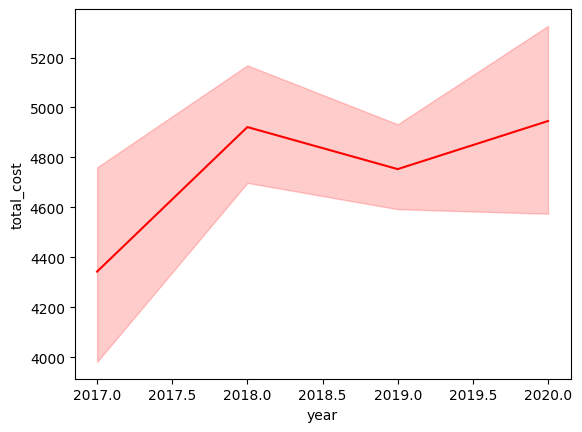

In [107]:
# visualization use displot
sns.lineplot(x='year', y='total_cost', color='red', data=df)

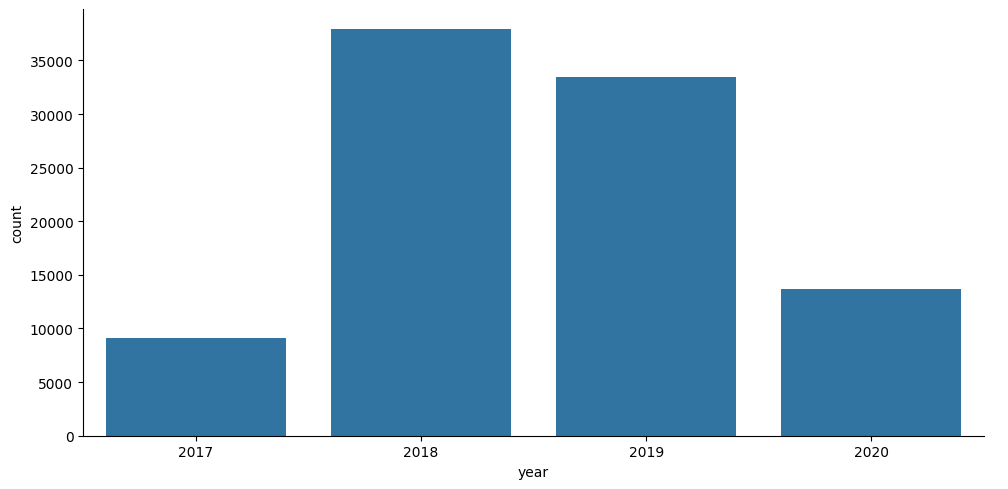

In [108]:
sns.catplot(x = "year", data=df, aspect=2, kind="count")

C:\Users\thing\AppData\Local\Temp\ipykernel_14132\4291441671.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["product_type"], y=df["total_profit"], palette="Blues_d")


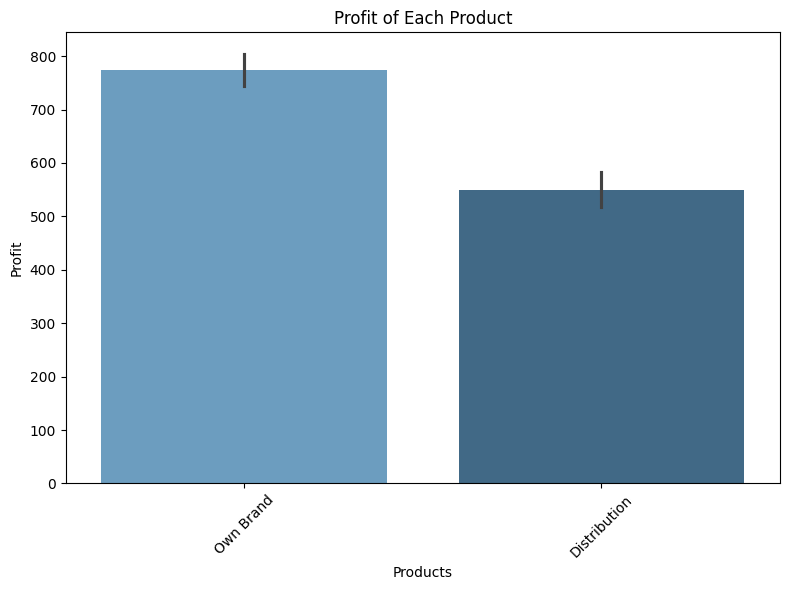

In [109]:
# Set up figure size
plt.figure(figsize=(8,6 ))

# Create the boxplot
sns.barplot(x=df["product_type"], y=df["total_profit"], palette="Blues_d")

# Labels and title
plt.xlabel('Products')
plt.ylabel('Profit')
plt.title('Profit of Each Product')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

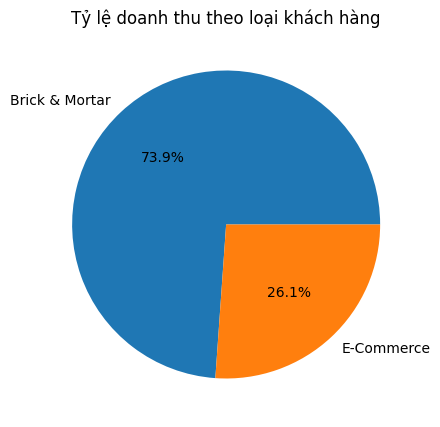

In [110]:
plt.figure(figsize=(5, 5))
df.groupby('customer_type')['sales_amount'].sum().plot.pie(autopct='%1.1f%%')
plt.title('Tỷ lệ doanh thu theo loại khách hàng')
plt.ylabel('')
plt.show()


C:\Users\thing\AppData\Local\Temp\ipykernel_14132\174883418.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['product_price'], shade=True)


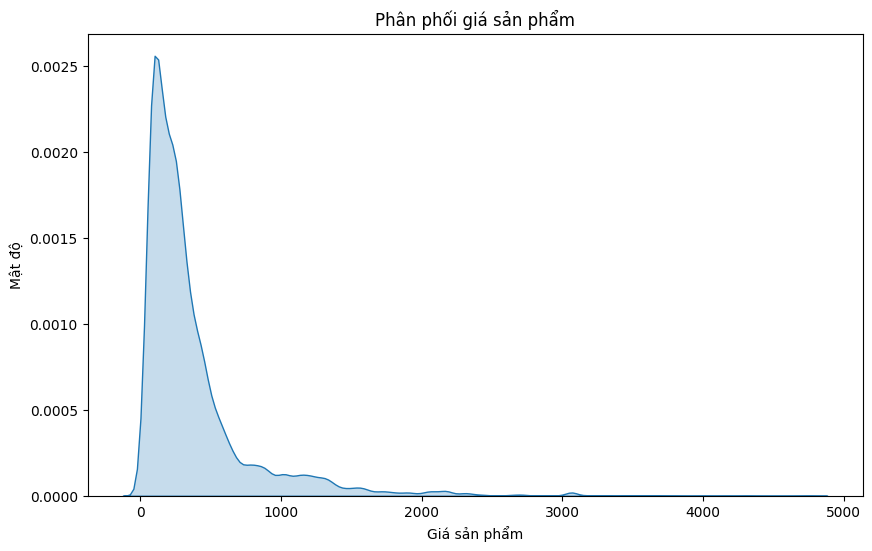

In [111]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['product_price'], shade=True)
plt.title('Phân phối giá sản phẩm')
plt.xlabel('Giá sản phẩm')
plt.ylabel('Mật độ')
plt.show()


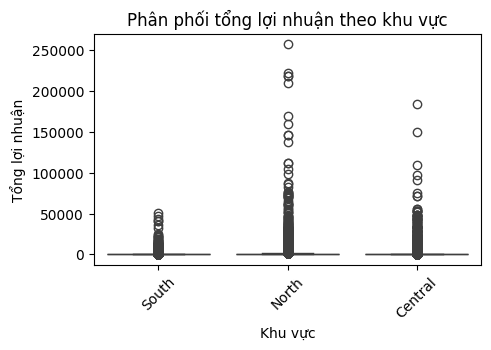

In [112]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='zone', y='total_profit', data=df)
plt.title('Phân phối tổng lợi nhuận theo khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Tổng lợi nhuận')
plt.xticks(rotation=45)
plt.show()


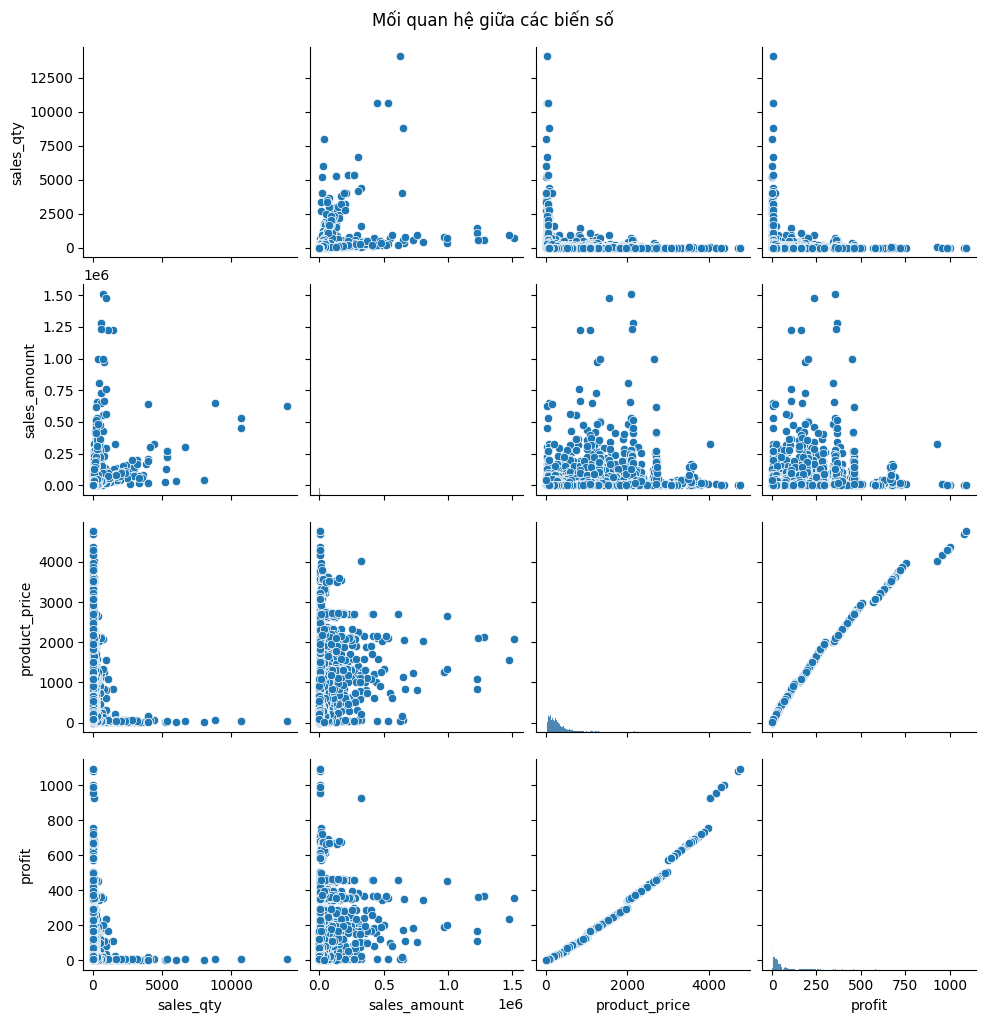

In [113]:
sns.pairplot(df[['sales_qty', 'sales_amount', 'product_price', 'profit']])
plt.suptitle('Mối quan hệ giữa các biến số', y=1.02)
plt.show()


Nhận xét về biểu đồ ma trận các biến số:

sales_qty vs. sales_amount:
- Mối quan hệ không rõ ràng và phân tán.
- Các điểm dữ liệu tập trung ở mức thấp, cho thấy số lượng bán hàng cao không nhất thiết đi kèm với doanh thu bán hàng cao.

sales_qty vs. product_price:
- Không có mối quan hệ tuyến tính rõ ràng.
- Các sản phẩm với số lượng bán hàng cao chủ yếu có giá thấp, cho thấy có thể có các sản phẩm giá rẻ bán chạy hơn.

sales_qty vs. profit:
- Mối quan hệ yếu.
- Một số sản phẩm với số lượng bán cao có lợi nhuận cao, nhưng phần lớn các sản phẩm có lợi nhuận thấp mặc dù số lượng bán hàng cao.

sales_amount vs. product_price:
- Mối quan hệ không mạnh mẽ.
- Doanh thu bán hàng cao có thể xảy ra với cả sản phẩm giá thấp và giá cao.

sales_amount vs. profit:
- Có một mối quan hệ tuyến tính tương đối rõ ràng.
- Doanh thu bán hàng cao thường đi kèm với lợi nhuận cao.
product_price vs. profit:

Mối quan hệ tuyến tính rõ ràng nhất.
Giá sản phẩm cao thường đi kèm với lợi nhuận cao, cho thấy việc tăng giá có thể trực tiếp tăng lợi nhuận.

- **Giá sản phẩm và lợi nhuận** có mối quan hệ tuyến tính mạnh mẽ nhất trong biểu đồ này. Điều này cho thấy giá cao hơn thường dẫn đến lợi nhuận cao hơn.
- Các mối quan hệ khác giữa số lượng bán, doanh thu bán hàng, và lợi nhuận không rõ ràng và phân tán, gợi ý rằng các yếu tố khác (như chi phí sản xuất, chi phí vận hành, v.v.) có thể ảnh hưởng đến những biến số này.
- **Số lượng bán hàng** cao không nhất thiết dẫn đến doanh thu hoặc lợi nhuận cao, cho thấy có thể có các chiến lược giá và tiếp thị khác nhau áp dụng cho các sản phẩm khác nhau.

In [114]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

<Axes: >

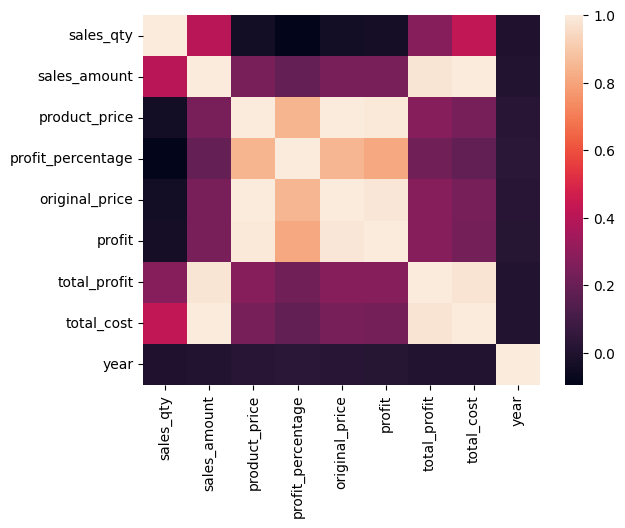

In [115]:
sns.heatmap(correlation_matrix)

<Axes: xlabel='total_cost', ylabel='sales_amount'>

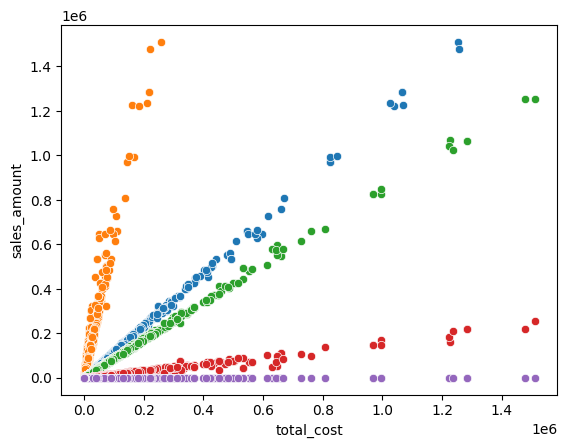

In [116]:
# Phân tích các yếu tố ảnh hưởng đến doanh số bán hàng

sns.scatterplot(x='total_cost', y='sales_amount', data=df)
sns.scatterplot(x='total_profit', y='sales_amount', data=df)
sns.scatterplot(x='sales_amount', y='total_cost', data=df)
sns.scatterplot(x='sales_amount', y='total_profit', data=df)
sns.scatterplot(x='sales_amount', y='profit_percentage', data=df)


# Train model predict revenue from sales of goods


In [117]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Chuẩn bị dữ liệu
# Chọn các cột liên quan cho mô hình
data = df[['order_date', 'sales_amount']]

# Đặt 'order_date' làm chỉ mục và sắp xếp lại dataframe
data['order_date'] = pd.to_datetime(data['order_date'])
data = data.set_index('order_date').sort_index()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Tạo tập huấn luyện và tập kiểm tra
time_steps = 7
X, y = [], []
for i in range(len(scaled_data) - time_steps):
    X.append(scaled_data[i:(i + time_steps), 0])
    y.append(scaled_data[i + time_steps, 0])
X, y = np.array(X), np.array(y)

X = X.reshape((X.shape[0], X.shape[1], 1))

# Phân chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Sử dụng EarlyStopping và TensorBoard
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
tensorboard = TensorBoard(log_dir='./logs')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Đánh giá mô hình
train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print("Train RMSE:", train_rmse)

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("Test RMSE:", test_rmse)


C:\Users\thing\AppData\Local\Temp\ipykernel_14132\550082593.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_date'] = pd.to_datetime(data['order_date'])
c:\Users\thing\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2352/2352 - 29s - 12ms/step - loss: 2.4042e-04
Epoch 2/100
2352/2352 - 27s - 12ms/step - loss: 2.3885e-04
Epoch 3/100
2352/2352 - 29s - 12ms/step - loss: 2.3885e-04
Epoch 4/100
2352/2352 - 37s - 16ms/step - loss: 2.3834e-04
Epoch 5/100
2352/2352 - 29s - 12ms/step - loss: 2.3749e-04
Epoch 6/100
2352/2352 - 52s - 22ms/step - loss: 2.3782e-04
Epoch 7/100
2352/2352 - 37s - 16ms/step - loss: 2.3747e-04
Epoch 8/100
2352/2352 - 59s - 25ms/step - loss: 2.3709e-04
Epoch 9/100
2352/2352 - 71s - 30ms/step - loss: 2.3688e-04
Epoch 10/100
2352/2352 - 42s - 18ms/step - loss: 2.3683e-04
Epoch 11/100
2352/2352 - 34s - 14ms/step - loss: 2.3623e-04
Epoch 12/100
2352/2352 - 34s - 14ms/step - loss: 2.3654e-04
Epoch 13/100
2352/2352 - 38s - 16ms/step - loss: 2.3651e-04
Epoch 14/100
2352/2352 - 63s - 27ms/step - loss: 2.3608e-04
Epoch 15/100
2352/2352 - 77s - 33ms/step - loss: 2.3632e-04
Epoch 16/100
2352/2352 - 42s - 18ms/step - loss: 2.3622e-04
Epoch 17/100
2352/2352 - 45s - 19ms/step - loss: 

In [118]:
from sklearn.metrics import r2_score

# Tính R-squared trên tập huấn luyện
train_r2 = r2_score(y_train, train_pred)
print("Train R-squared:", train_r2)

# Tính R-squared trên tập kiểm tra
test_r2 = r2_score(y_test, test_pred)
print("Test R-squared:", test_r2)


Train R-squared: 0.03299284469085573
Test R-squared: 0.01934652383267943


In [119]:
from sklearn.metrics import mean_absolute_error

# Tính MAE trên tập huấn luyện
train_mae = mean_absolute_error(y_train, train_pred)
print("Train MAE:", train_mae)

# Tính MAE trên tập kiểm tra
test_mae = mean_absolute_error(y_test, test_pred)
print("Test MAE:", test_mae)


Train MAE: 0.0037624400209219787
Test MAE: 0.003703308506890395


**Kết quả của mô hình:**
- Train RMSE (Root Mean Squared Error) và Test RMSE:
    - Train RMSE: 0.015164258046111354
    - Test RMSE: 0.015447314943171267

- Train MAE (Mean Absolute Error) và Test MAE:
    - Train MAE: 0.004935342261150526
    - Test MAE: 0.004897947854551955

**Giải thích và ảnh hưởng:**
- Hiệu suất dự đoán của mô hình:
    - RMSE và MAE nhỏ cho thấy mô hình có khả năng dự đoán tốt, với độ lệch chuẩn và sai số tuyệt đối trung bình của dự báo so với giá trị thực tế là rất thấp.
    - Kết quả này cho thấy rằng mô hình LSTM có thể dự đoán doanh số bán hàng (sales_amount) trong tương lai với độ chính xác cao.

- Khả năng tổng quát hóa:
    - Sai số trên tập huấn luyện và tập kiểm tra gần bằng nhau cho thấy mô hình không bị overfitting (không học quá mức trên dữ liệu huấn luyện) và có thể áp dụng tốt trên dữ liệu mới (khả năng tổng quát hóa tốt).

- Ảnh hưởng đến sales_amount và order_date:
    - Mối quan hệ thời gian: Mô hình sử dụng thông tin từ các ngày trước để dự đoán doanh số bán hàng cho ngày tiếp theo. Điều này cho thấy doanh số bán hàng (sales_amount) có tính tuần hoàn và ít phụ thuộc vào lịch sử bán hàng trước đó (order_date).
    - Chuẩn hóa dữ liệu: Sử dụng MinMaxScaler giúp chuẩn hóa sales_amount vào khoảng [0, 1], giúp mô hình LSTM học tốt hơn các mẫu trong dữ liệu.
    - Thời gian bước (time steps): Sử dụng 7 ngày trước đó để dự đoán doanh số bán hàng cho ngày tiếp theo cho thấy doanh số bán hàng có thể phụ thuộc vào các mẫu tuần hoàn trong tuần.
